# Milestone 1 Notebook

#### Authors: Julien Gordon, Adam Morphy, Mukund Iyer, Shiva Shankar Jena

## Questions 1. and 2.

#### Link to Team Contract: https://docs.google.com/document/d/1uDSQLGPSfcgl3PisaC1-ngaViqJCkBiWFmDsN2FzZ9w/edit?usp=sharing
#### Link ot Repo: https://github.com/UBC-MDS/DSCI_525_Group26

In [2]:
import re
import os
import glob
import zipfile
import requests
from urllib.request import urlretrieve
import json
import pandas as pd
import numpy as np

## 3. Data Download

In [3]:
# Necessary metadata
article_id = 14096681  # this is the unique identifier of the article on figshare
url = f"https://api.figshare.com/v2/articles/{article_id}"
headers = {"Content-Type": "application/json"}
output_directory = "figsharerainfall/"

In [4]:
response = requests.request("GET", url, headers=headers)
data = json.loads(response.text)  # this contains all the articles data, feel free to check it out
files = data["files"]             # this is just the data about the files, which is what we want
files

[{'id': 26579150,
  'name': 'daily_rainfall_2014.png',
  'size': 58863,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579150',
  'supplied_md5': 'fd32a2ffde300a31f8d63b1825d47e5e',
  'computed_md5': 'fd32a2ffde300a31f8d63b1825d47e5e'},
 {'id': 26579171,
  'name': 'environment.yml',
  'size': 192,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579171',
  'supplied_md5': '060b2020017eed93a1ee7dd8c65b2f34',
  'computed_md5': '060b2020017eed93a1ee7dd8c65b2f34'},
 {'id': 26586554,
  'name': 'README.md',
  'size': 5422,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26586554',
  'supplied_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c',
  'computed_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c'},
 {'id': 26766812,
  'name': 'data.zip',
  'size': 814041183,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26766812',
  'supplied_md5': 'b517383f76e77bd03755a63a8f

In [5]:
%%time
files_to_dl = ["data.zip"]
for file in files:
    if file["name"] in files_to_dl:
        os.makedirs(output_directory, exist_ok=True)
        urlretrieve(file["download_url"], output_directory + file["name"])

CPU times: user 4.21 s, sys: 10.5 s, total: 14.7 s
Wall time: 1min 8s


In [6]:
%%time
with zipfile.ZipFile(os.path.join(output_directory, "data.zip"), 'r') as f:
    f.extractall(output_directory)

CPU times: user 30.7 s, sys: 12.8 s, total: 43.5 s
Wall time: 1min 10s


> Data Download Comparison

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Adam Morphy | MacOS Big Sur | 8GB | 1.8 GHz Dual-Core Intel Core i5 | Yes | 68s|
| Mukund Iyer | MacOS Monterey | 8GB | 1.4 GHz Quad-Core Intel Core i5 | Yes | |
| Julien Gordon | Ubuntu 20.04.4 LTS | 16GB | AMD® Ryzen 7 5800h with radeon graphics | Yes | |
| Shiva Shankar Jena | MacOS Catalina 10.15.7 | 4GB | 1.4 GHz Dual-Core Intel Core i5 | Yes | |

> Data Extract Comparison

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Adam Morphy | MacOS Big Sur | 8GB | 1.8 GHz Dual-Core Intel Core i5 | Yes | 70s |
| Mukund Iyer | MacOS Monterey | 8GB | 1.4 GHz Quad-Core Intel Core i5 | Yes | |
| Julien Gordon | Ubuntu 20.04.4 LTS | 16GB | AMD® Ryzen 7 5800h with radeon graphics | Yes | |
| Shiva Shankar Jena | MacOS Catalina 10.15.7 | 4GB | 1.4 GHz Dual-Core Intel Core i5 | Yes | |

## 4. Combining data CSVs

In [10]:
%%time
use_cols = ["rain", "lat_min", "lat_max", "Ion_min", "Ion_max", "rain (mm/day)", "model"]
files = glob.glob('figsharerainfall/*.csv')
excluded_files = ["figsharerainfall/observed_daily_rainfall_SYD.csv"]
df = pd.concat(
    (
        pd.read_csv(file, index_col=0)
        .assign(model=re.findall(r'\/(.*?)_', file)[0])
        for file in files
        if file not in excluded_files
    )
)
df.to_csv("figsharerainfall/combined_data.csv")

KeyboardInterrupt: 

In [15]:
%%time
df = pd.read_csv('figsharerainfall/combined_data.csv',    
                 index_col=0,
                 parse_dates=True )


CPU times: user 25.4 s, sys: 9.44 s, total: 34.8 s
Wall time: 38.7 s


In [ ]:
%%time
head(df)

> Combining Data Comparison

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Adam Morphy | MacOS Big Sur | 8GB | 1.8 GHz Dual-Core Intel Core i5 | Yes | 10 mins (DNF) |
| Mukund Iyer | MacOS Monterey | 8GB | 1.4 GHz Quad-Core Intel Core i5 | Yes | |
| Julien Gordon | Ubuntu 20.04.4 LTS | 16GB | AMD® Ryzen 7 5800h with radeon graphics | Yes | |
| Shiva Shankar Jena | MacOS Catalina 10.15.7 | 4GB | 1.4 GHz Dual-Core Intel Core i5 | Yes | |

## 5. Load the combined CSV to memory and perform a simple EDA

In [44]:
%%time
df_combined = pd.read_csv(
    "figsharerainfall/combined_data.csv", 
    index_col=0,
    parse_dates=True 
)

CPU times: user 22 s, sys: 7.09 s, total: 29.1 s
Wall time: 32.3 s


In [45]:
%%time
# EDA
df_combined.model.nunique()

CPU times: user 955 ms, sys: 80.9 ms, total: 1.04 s
Wall time: 1.06 s


8

In [18]:
%%time
df_combined.model.value_counts()

CPU times: user 1.23 s, sys: 32.5 ms, total: 1.26 s
Wall time: 1.31 s


CMCC-CM2-HR4       3541230
FGOALS-f3-L        3219300
MRI-ESM2-0         3037320
GFDL-CM4           2431971
ACCESS-CM2         1932840
MPI-ESM-1-2-HAM     966420
AWI-ESM-1-1-LR      966420
NorESM2-LM          919800
Name: model, dtype: int64

In [20]:
%%time
df_combined.head()

CPU times: user 185 µs, sys: 27 µs, total: 212 µs
Wall time: 195 µs


,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
time,,,,,,
1889-01-01 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.244226e-13,MPI-ESM-1-2-HAM
1889-01-02 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.217326e-13,MPI-ESM-1-2-HAM
1889-01-03 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.498125e-13,MPI-ESM-1-2-HAM
1889-01-04 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.251282e-13,MPI-ESM-1-2-HAM
1889-01-05 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.270161e-13,MPI-ESM-1-2-HAM


> Load Data & EDA Comparison

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Adam Morphy | MacOS Big Sur | 8GB | 1.8 GHz Dual-Core Intel Core i5 | Yes | 30s |
| Mukund Iyer | MacOS Monterey | 8GB | 1.4 GHz Quad-Core Intel Core i5 | Yes | |
| Julien Gordon | Ubuntu 20.04.4 LTS | 16GB | AMD® Ryzen 7 5800h with radeon graphics | Yes | |
| Shiva Shankar Jena | MacOS Catalina 10.15.7 | 4GB | 1.4 GHz Dual-Core Intel Core i5 | Yes | |

## 6. Perform a simple EDA in R

In [22]:
%load_ext rpy2.ipython

#importing libraries to use Arrow:
import pyarrow.dataset as ds
import pyarrow as pa
import pandas as pd
import pyarrow 
from pyarrow import csv
import rpy2_arrow.pyarrow_rarrow as pyra


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [25]:
%%time
#loading data as pyarrow dataset
dataset = ds.dataset("figsharerainfall/combined_data.csv", format="csv")

#converting to pyarrow table
table = dataset.to_table()

#converting to rarrow table
r_table = pyra.converter.py2rpy(table)



CPU times: user 22.5 s, sys: 8.17 s, total: 30.7 s
Wall time: 33 s


In [26]:
%%R
suppressMessages(library(arrow, warn.conflicts = FALSE))
suppressMessages(library(dplyr, warn.conflicts = FALSE))
if (!require(ggplot2)) install.packages("ggplot2")
suppressMessages(library(ggplot2, warn.conflicts = FALSE))

R[write to console]: Loading required package: ggplot2



--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Australia (Perth) [https]
 6: Austria [https]
 7: Belgium (Brussels) [https]
 8: Brazil (PR) [https]
 9: Brazil (RJ) [https]
10: Brazil (SP 1) [https]
11: Brazil (SP 2) [https]
12: Bulgaria [https]
13: Canada (MB) [https]
14: Canada (ON 2) [https]
15: Canada (ON 3) [https]
16: Chile (Santiago) [https]
17: China (Beijing 2) [https]
18: China (Beijing 3) [https]
19: China (Hefei) [https]
20: China (Hong Kong) [https]
21: China (Guangzhou) [https]
22: China (Lanzhou) [https]
23: China (Nanjing) [https]
24: China (Shanghai 2) [https]
25: China (Shenzhen) [https]
26: Colombia (Cali) [https]
27: Costa Rica [https]
28: Cyprus [https]
29: Czech Republic [https]
30: Denmark [https]
31: East Asia [https]
32: Ecuador (Cuenca) [https]
33: Ecuador (Quito) [https]
34: Estonia [https]
35: Fran

Selection:  Canada


Enter an item from the menu, or 0 to exit


Selection:  13


R[write to console]: also installing the dependencies ‘lattice’, ‘colorspace’, ‘nlme’, ‘Matrix’, ‘farver’, ‘labeling’, ‘munsell’, ‘RColorBrewer’, ‘viridisLite’, ‘digest’, ‘gtable’, ‘isoband’, ‘MASS’, ‘mgcv’, ‘scales’, ‘withr’


R[write to console]: trying URL 'https://muug.ca/mirror/cran/src/contrib/lattice_0.20-45.tar.gz'

R[write to console]: Content type 'application/octet-stream'
R[write to console]:  length 399470 bytes (390 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write t

x86_64-apple-darwin13.4.0-clang -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG   -D_FORTIFY_SOURCE=2 -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -mmacosx-version-min=10.9 -I/Users/adammorphy/opt/miniconda3/envs/525_2022/include   -fPIC  -march=core2 -mtune=haswell -mssse3 -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -fdebug-prefix-map=/Users/runner/miniforge3/conda-bld/r-base-split_1630154249442/work=/usr/local/src/conda/r-base-4.1.1 -fdebug-prefix-map=/Users/adammorphy/opt/miniconda3/envs/525_2022=/usr/local/src/conda-prefix  -c init.c -o init.o
x86_64-apple-darwin13.4.0-clang -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG   -D_FORTIFY_SOURCE=2 -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -mmacosx-version-min=10.9 -I/Users/adammorphy/opt/miniconda3/envs/525_2022/include   -fPIC  -march=core2 -mtune=haswell -msss

ld: warning: -pie being ignored. It is only used when linking a main executable
installing to /Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/library/00LOCK-lattice/00new/lattice/libs
** R
** data
*** moving datasets to lazyload DB
** demo
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (lattice)
* installing *source* package ‘colorspace’ ...
** package ‘colorspace’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


x86_64-apple-darwin13.4.0-clang -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG   -D_FORTIFY_SOURCE=2 -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -mmacosx-version-min=10.9 -I/Users/adammorphy/opt/miniconda3/envs/525_2022/include   -fPIC  -march=core2 -mtune=haswell -mssse3 -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -fdebug-prefix-map=/Users/runner/miniforge3/conda-bld/r-base-split_1630154249442/work=/usr/local/src/conda/r-base-4.1.1 -fdebug-prefix-map=/Users/adammorphy/opt/miniconda3/envs/525_2022=/usr/local/src/conda-prefix  -c colorspace.c -o colorspace.o
x86_64-apple-darwin13.4.0-clang -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG   -D_FORTIFY_SOURCE=2 -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -mmacosx-version-min=10.9 -I/Users/adammorphy/opt/miniconda3/envs/525_2022/include   -fPIC  -march=core2 -mtune=h

ld: warning: -pie being ignored. It is only used when linking a main executable
installing to /Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/library/00LOCK-colorspace/00new/colorspace/libs
** R
** data
*** moving datasets to lazyload DB
** demo
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (colorspace)
* installing *source* package ‘farver’ ...
** package ‘farver’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


x86_64-apple-darwin13.4.0-clang++ -std=gnu++11 -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG   -D_FORTIFY_SOURCE=2 -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -mmacosx-version-min=10.9 -I/Users/adammorphy/opt/miniconda3/envs/525_2022/include   -fPIC  -march=core2 -mtune=haswell -mssse3 -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -stdlib=libc++ -fvisibility-inlines-hidden  -fmessage-length=0 -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -fdebug-prefix-map=/Users/runner/miniforge3/conda-bld/r-base-split_1630154249442/work=/usr/local/src/conda/r-base-4.1.1 -fdebug-prefix-map=/Users/adammorphy/opt/miniconda3/envs/525_2022=/usr/local/src/conda-prefix  -c ColorSpace.cpp -o ColorSpace.o
x86_64-apple-darwin13.4.0-clang++ -std=gnu++11 -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG   -D_FORTIFY_SOURCE=2 -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -mmacosx-version-m

ld: warning: -pie being ignored. It is only used when linking a main executable
installing to /Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/library/00LOCK-farver/00new/farver/libs
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (farver)
* installing *source* package ‘labeling’ ...
** package ‘labeling’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be load

x86_64-apple-darwin13.4.0-clang++ -std=gnu++11 -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG   -D_FORTIFY_SOURCE=2 -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -mmacosx-version-min=10.9 -I/Users/adammorphy/opt/miniconda3/envs/525_2022/include   -fPIC  -march=core2 -mtune=haswell -mssse3 -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -stdlib=libc++ -fvisibility-inlines-hidden  -fmessage-length=0 -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -fdebug-prefix-map=/Users/runner/miniforge3/conda-bld/r-base-split_1630154249442/work=/usr/local/src/conda/r-base-4.1.1 -fdebug-prefix-map=/Users/adammorphy/opt/miniconda3/envs/525_2022=/usr/local/src/conda-prefix  -c SpookyV2.cpp -o SpookyV2.o
x86_64-apple-darwin13.4.0-clang -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG   -D_FORTIFY_SOURCE=2 -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -mmacosx-version-min=10.9 -I/Users/ad

ld: warning: -pie being ignored. It is only used when linking a main executable
installing to /Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/library/00LOCK-digest/00new/digest/libs
** R
** demo
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (digest)
* installing *source* package ‘gtable’ ...
** package ‘gtable’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded

x86_64-apple-darwin13.4.0-clang++ -std=gnu++11 -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG -Itestthat  -D_FORTIFY_SOURCE=2 -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -mmacosx-version-min=10.9 -I/Users/adammorphy/opt/miniconda3/envs/525_2022/include   -fPIC  -march=core2 -mtune=haswell -mssse3 -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -stdlib=libc++ -fvisibility-inlines-hidden  -fmessage-length=0 -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -fdebug-prefix-map=/Users/runner/miniforge3/conda-bld/r-base-split_1630154249442/work=/usr/local/src/conda/r-base-4.1.1 -fdebug-prefix-map=/Users/adammorphy/opt/miniconda3/envs/525_2022=/usr/local/src/conda-prefix  -c clip-lines.cpp -o clip-lines.o
x86_64-apple-darwin13.4.0-clang++ -std=gnu++11 -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG -Itestthat  -D_FORTIFY_SOURCE=2 -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/includ

ld: warning: -pie being ignored. It is only used when linking a main executable
installing to /Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/library/00LOCK-isoband/00new/isoband/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (isoband)
* installing *source* package ‘MASS’ ...
** package ‘MASS’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


x86_64-apple-darwin13.4.0-clang -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG   -D_FORTIFY_SOURCE=2 -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -mmacosx-version-min=10.9 -I/Users/adammorphy/opt/miniconda3/envs/525_2022/include   -fPIC  -march=core2 -mtune=haswell -mssse3 -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -fdebug-prefix-map=/Users/runner/miniforge3/conda-bld/r-base-split_1630154249442/work=/usr/local/src/conda/r-base-4.1.1 -fdebug-prefix-map=/Users/adammorphy/opt/miniconda3/envs/525_2022=/usr/local/src/conda-prefix  -c MASS.c -o MASS.o
x86_64-apple-darwin13.4.0-clang -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG   -D_FORTIFY_SOURCE=2 -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -mmacosx-version-min=10.9 -I/Users/adammorphy/opt/miniconda3/envs/525_2022/include   -fPIC  -march=core2 -mtune=haswell -msss

ld: warning: -pie being ignored. It is only used when linking a main executable
installing to /Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/library/00LOCK-MASS/00new/MASS/libs
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (MASS)
* installing *source* package ‘withr’ ...
** package ‘withr’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loa

x86_64-apple-darwin13.4.0-gfortran  -fPIC  -march=core2 -mtune=haswell -ftree-vectorize -fPIC -fstack-protector -O2 -pipe -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -fdebug-prefix-map=/Users/runner/miniforge3/conda-bld/r-base-split_1630154249442/work=/usr/local/src/conda/r-base-4.1.1 -fdebug-prefix-map=/Users/adammorphy/opt/miniconda3/envs/525_2022=/usr/local/src/conda-prefix  -c chol.f -o chol.o
x86_64-apple-darwin13.4.0-clang -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG   -D_FORTIFY_SOURCE=2 -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -mmacosx-version-min=10.9 -I/Users/adammorphy/opt/miniconda3/envs/525_2022/include   -fPIC  -march=core2 -mtune=haswell -mssse3 -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -fdebug-prefix-map=/Users/runner/miniforge3/conda-bld/r-base-split_1630154249442/work=/usr/local/src/conda/r-base-4.1.1 -fdebug-pre

ld: warning: directory not found for option '-L/Users/runner/miniforge3/conda-bld/r-base-split_1630154249442/_build_env/lib'
ld: warning: -pie being ignored. It is only used when linking a main executable
ld: warning: object file (chol.o) was built for newer macOS version (10.16) than being linked (10.15.6)
ld: warning: object file (rs.o) was built for newer macOS version (10.16) than being linked (10.15.6)
installing to /Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/library/00LOCK-nlme/00new/nlme/libs
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (nlme)
* installing *sour

x86_64-apple-darwin13.4.0-clang -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG -DNTIMER -I./SuiteSparse_config -DUSE_FC_LEN_T  -D_FORTIFY_SOURCE=2 -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -mmacosx-version-min=10.9 -I/Users/adammorphy/opt/miniconda3/envs/525_2022/include   -fPIC  -march=core2 -mtune=haswell -mssse3 -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -fdebug-prefix-map=/Users/runner/miniforge3/conda-bld/r-base-split_1630154249442/work=/usr/local/src/conda/r-base-4.1.1 -fdebug-prefix-map=/Users/adammorphy/opt/miniconda3/envs/525_2022=/usr/local/src/conda-prefix  -c CHMfactor.c -o CHMfactor.o
x86_64-apple-darwin13.4.0-clang -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG -DNTIMER -I./SuiteSparse_config -DUSE_FC_LEN_T  -D_FORTIFY_SOURCE=2 -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -mmacosx-version-min=10

../Core/cholmod_change_factor.c:525:21: warning: implicit conversion from 'size_t' (aka 'unsigned long') to 'double' changes value from 18446744073709551615 to 18446744073709551616 [-Wimplicit-const-int-float-conversion]
                xlnz = MIN (xlnz, Size_max) ;
                       ~~~~~~~~~~~^~~~~~~~~
../Include/cholmod_internal.h:207:19: note: expanded from macro 'Size_max'
#define Size_max ((size_t) (-1))
                  ^~~~~~~~~~~~~
../Include/cholmod_internal.h:98:27: note: expanded from macro 'MIN'
#define MIN(a,b) (((a) < (b)) ? (a) : (b))
                       ~  ^
../Core/cholmod_change_factor.c:525:21: warning: implicit conversion from 'size_t' (aka 'unsigned long') to 'double' changes value from 18446744073709551615 to 18446744073709551616 [-Wimplicit-const-int-float-conversion]
                xlnz = MIN (xlnz, Size_max) ;
                     ~            ^~~~~~~~
../Include/cholmod_internal.h:207:19: note: expanded from macro 'Size_max'
#define Size_max ((size_

x86_64-apple-darwin13.4.0-clang -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -D_FORTIFY_SOURCE=2 -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -mmacosx-version-min=10.9 -I/Users/adammorphy/opt/miniconda3/envs/525_2022/include   -fPIC  -march=core2 -mtune=haswell -mssse3 -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -fdebug-prefix-map=/Users/runner/miniforge3/conda-bld/r-base-split_1630154249442/work=/usr/local/src/conda/r-base-4.1.1 -fdebug-prefix-map=/Users/adammorphy/opt/miniconda3/envs/525_2022=/usr/local/src/conda-prefix  -c ../Core/cholmod_common.c -o cholmod_common.o
x86_64-apple-darwin13.4.0-clang -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Includ

../Core/cholmod_factor.c:385:14: warning: implicit conversion from 'size_t' (aka 'unsigned long') to 'double' changes value from 18446744073709551615 to 18446744073709551616 [-Wimplicit-const-int-float-conversion]
        if (xneed > Size_max ||
                  ~ ^~~~~~~~
../Include/cholmod_internal.h:207:19: note: expanded from macro 'Size_max'
#define Size_max ((size_t) (-1))
                  ^~~~~~~~~~~~~
1 warning generated.


x86_64-apple-darwin13.4.0-clang -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -D_FORTIFY_SOURCE=2 -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -mmacosx-version-min=10.9 -I/Users/adammorphy/opt/miniconda3/envs/525_2022/include   -fPIC  -march=core2 -mtune=haswell -mssse3 -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -fdebug-prefix-map=/Users/runner/miniforge3/conda-bld/r-base-split_1630154249442/work=/usr/local/src/conda/r-base-4.1.1 -fdebug-prefix-map=/Users/adammorphy/opt/miniconda3/envs/525_2022=/usr/local/src/conda-prefix  -c ../Core/cholmod_memory.c -o cholmod_memory.o
x86_64-apple-darwin13.4.0-clang -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Includ

../Core/cholmod_change_factor.c:525:21: warning: implicit conversion from 'size_t' (aka 'unsigned long') to 'double' changes value from 18446744073709551615 to 18446744073709551616 [-Wimplicit-const-int-float-conversion]
                xlnz = MIN (xlnz, Size_max) ;
                       ~~~~~~~~~~~^~~~~~~~~
../Include/cholmod_internal.h:207:19: note: expanded from macro 'Size_max'
#define Size_max ((size_t) (-1))
                  ^~~~~~~~~~~~~
../Include/cholmod_internal.h:98:27: note: expanded from macro 'MIN'
#define MIN(a,b) (((a) < (b)) ? (a) : (b))
                       ~  ^
../Core/cholmod_change_factor.c:525:21: warning: implicit conversion from 'size_t' (aka 'unsigned long') to 'double' changes value from 18446744073709551615 to 18446744073709551616 [-Wimplicit-const-int-float-conversion]
                xlnz = MIN (xlnz, Size_max) ;
                     ~            ^~~~~~~~
../Include/cholmod_internal.h:207:19: note: expanded from macro 'Size_max'
#define Size_max ((size_

x86_64-apple-darwin13.4.0-clang -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -D_FORTIFY_SOURCE=2 -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -mmacosx-version-min=10.9 -I/Users/adammorphy/opt/miniconda3/envs/525_2022/include   -fPIC  -march=core2 -mtune=haswell -mssse3 -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -fdebug-prefix-map=/Users/runner/miniforge3/conda-bld/r-base-split_1630154249442/work=/usr/local/src/conda/r-base-4.1.1 -fdebug-prefix-map=/Users/adammorphy/opt/miniconda3/envs/525_2022=/usr/local/src/conda-prefix  -DDLONG -c  ../Core/cholmod_common.c -o cholmod_l_common.o
x86_64-apple-darwin13.4.0-clang -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../CO

../Core/cholmod_factor.c:385:14: warning: implicit conversion from 'size_t' (aka 'unsigned long') to 'double' changes value from 18446744073709551615 to 18446744073709551616 [-Wimplicit-const-int-float-conversion]
        if (xneed > Size_max ||
                  ~ ^~~~~~~~
../Include/cholmod_internal.h:207:19: note: expanded from macro 'Size_max'
#define Size_max ((size_t) (-1))
                  ^~~~~~~~~~~~~
1 warning generated.


x86_64-apple-darwin13.4.0-clang -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -D_FORTIFY_SOURCE=2 -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -mmacosx-version-min=10.9 -I/Users/adammorphy/opt/miniconda3/envs/525_2022/include   -fPIC  -march=core2 -mtune=haswell -mssse3 -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -fdebug-prefix-map=/Users/runner/miniforge3/conda-bld/r-base-split_1630154249442/work=/usr/local/src/conda/r-base-4.1.1 -fdebug-prefix-map=/Users/adammorphy/opt/miniconda3/envs/525_2022=/usr/local/src/conda-prefix  -DDLONG -c  ../Core/cholmod_memory.c -o cholmod_l_memory.o
x86_64-apple-darwin13.4.0-clang -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../CO

../Check/cholmod_read.c:435:59: warning: implicit conversion from 'long' to 'double' changes value from 9223372036854775807 to 9223372036854775808 [-Wimplicit-const-int-float-conversion]
            if (nitems < 2 || nitems > 4 || l1 > Int_max || l2 > Int_max)
                                                               ~ ^~~~~~~
../Include/cholmod_internal.h:222:17: note: expanded from macro 'Int_max'
#define Int_max SuiteSparse_long_max
                ^~~~~~~~~~~~~~~~~~~~
../../SuiteSparse_config/SuiteSparse_config.h:66:30: note: expanded from macro 'SuiteSparse_long_max'
#define SuiteSparse_long_max LONG_MAX
                             ^~~~~~~~
/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/clang/13.0.1/include/limits.h:47:19: note: expanded from macro 'LONG_MAX'
#define LONG_MAX  __LONG_MAX__
                  ^~~~~~~~~~~~
<built-in>:42:22: note: expanded from here
#define __LONG_MAX__ 9223372036854775807L
                     ^~~~~~~~~~~~~~~~~~~~
../Check/cholmod_read.c:43

x86_64-apple-darwin13.4.0-clang -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -D_FORTIFY_SOURCE=2 -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -mmacosx-version-min=10.9 -I/Users/adammorphy/opt/miniconda3/envs/525_2022/include   -fPIC  -march=core2 -mtune=haswell -mssse3 -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -isystem /Users/adammorphy/opt/miniconda3/envs/525_2022/include -fdebug-prefix-map=/Users/runner/miniforge3/conda-bld/r-base-split_1630154249442/work=/usr/local/src/conda/r-base-4.1.1 -fdebug-prefix-map=/Users/adammorphy/opt/miniconda3/envs/525_2022=/usr/local/src/conda-prefix  -DDLONG -c  ../Check/cholmod_write.c -o cholmod_l_write.o
x86_64-apple-darwin13.4.0-clang -I"/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COL

../Supernodal/cholmod_super_symbolic.c:577:24: warning: implicit conversion from 'unsigned long' to 'double' changes value from 1152921504606846975 to 1152921504606846976 [-Wimplicit-const-int-float-conversion]
                        (xtotsize < Int_max / sizeof (double)) ;
                                  ~ ~~~~~~~~^~~~~~~~~~~~~~~~~
../Supernodal/cholmod_super_symbolic.c:676:42: warning: implicit conversion from 'long' to 'double' changes value from 9223372036854775807 to 9223372036854775808 [-Wimplicit-const-int-float-conversion]
        if (ssize < 0 ||(find_xsize && xxsize > Int_max))
                                              ~ ^~~~~~~
../Include/cholmod_internal.h:222:17: note: expanded from macro 'Int_max'
#define Int_max SuiteSparse_long_max
                ^~~~~~~~~~~~~~~~~~~~
../../SuiteSparse_config/SuiteSparse_config.h:66:30: note: expanded from macro 'SuiteSparse_long_max'
#define SuiteSparse_long_max LONG_MAX
                             ^~~~~~~~
/Users/adammorphy/op

x86_64-apple-darwin13.4.0-ar -rucs ../../CHOLMOD.a cholmod_aat.o cholmod_add.o cholmod_band.o cholmod_change_factor.o cholmod_common.o cholmod_complex.o cholmod_copy.o cholmod_dense.o cholmod_error.o cholmod_factor.o cholmod_memory.o cholmod_sparse.o cholmod_transpose.o cholmod_triplet.o cholmod_version.o cholmod_check.o cholmod_read.o cholmod_write.o cholmod_amd.o cholmod_analyze.o cholmod_colamd.o cholmod_etree.o cholmod_factorize.o cholmod_postorder.o cholmod_rcond.o cholmod_resymbol.o cholmod_rowcolcounts.o cholmod_rowfac.o cholmod_solve.o cholmod_spsolve.o cholmod_drop.o cholmod_horzcat.o cholmod_norm.o cholmod_scale.o cholmod_sdmult.o cholmod_ssmult.o cholmod_submatrix.o cholmod_vertcat.o cholmod_symmetry.o cholmod_rowadd.o cholmod_rowdel.o cholmod_updown.o cholmod_super_numeric.o cholmod_super_solve.o cholmod_super_symbolic.o  cholmod_l_aat.o cholmod_l_add.o cholmod_l_band.o cholmod_l_change_factor.o cholmod_l_common.o cholmod_l_complex.o cholmod_l_copy.o cholmod_l_dense.o cholm

/Users/adammorphy/opt/miniconda3/envs/525_2022/bin/x86_64-apple-darwin13.4.0-ranlib: file: ../../AMD.a(amd_i_dump.o) has no symbols
/Users/adammorphy/opt/miniconda3/envs/525_2022/bin/x86_64-apple-darwin13.4.0-ranlib: file: ../../AMD.a(amd_l_dump.o) has no symbols


x86_64-apple-darwin13.4.0-ar -rucs ../SuiteSparse_config.a SuiteSparse_config.o
make[1]: Leaving directory '/private/var/folders/0g/ct6tbynn1yb476tbykp5s6jh0000gn/T/RtmpSPEIOE/R.INSTALL56032e036e80/Matrix/src/SuiteSparse_config'
x86_64-apple-darwin13.4.0-clang -dynamiclib -Wl,-headerpad_max_install_names -undefined dynamic_lookup -single_module -multiply_defined suppress -L/Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/lib -Wl,-dead_strip_dylibs -Wl,-pie -Wl,-headerpad_max_install_names -Wl,-dead_strip_dylibs -Wl,-rpath,/Users/adammorphy/opt/miniconda3/envs/525_2022/lib -L/Users/adammorphy/opt/miniconda3/envs/525_2022/lib -o Matrix.dylib CHMfactor.o Csparse.o TMatrix_as.o Tsparse.o init.o Mutils.o chm_common.o cs.o cs_utils.o dense.o dgCMatrix.o dgTMatrix.o dgeMatrix.o dpoMatrix.o dppMatrix.o dsCMatrix.o dsyMatrix.o dspMatrix.o dtCMatrix.o dtTMatrix.o dtrMatrix.o dtpMatrix.o factorizations.o ldense.o lgCMatrix.o sparseQR.o abIndex.o packedMatrix.o CHOLMOD.a COLAMD.a AMD.a SuiteSp

ld: warning: directory not found for option '-L/Users/runner/miniforge3/conda-bld/r-base-split_1630154249442/_build_env/lib'
ld: warning: -pie being ignored. It is only used when linking a main executable
installing to /Users/adammorphy/opt/miniconda3/envs/525_2022/lib/R/library/00LOCK-Matrix/00new/Matrix/libs
** R
** data
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (Matrix)
* installing *source* package ‘munsell’ ...
** package ‘munsell’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing hel

In [40]:
%%R

start_date = as.POSIXct(strptime("2014-01-01 04:00:00", "%Y-%m-%d %H:%M:%S"))
end_date = as.POSIXct(strptime("2014-12-30 04:00:00", "%Y-%m-%d %H:%M:%S"))
model_sel = 'ACCESS-CM2'

In [41]:
%%time
%%R -i r_table

result <- r_table %>%
filter(model == model_sel, time > start_date, time < end_date) %>% 
mutate(rain = `rain (mm/day)`) %>% 
select(time, rain, model) %>% 
collect()

print(result)

# A tibble: 15,204 × 3
   time                    rain model     
   <dttm>                 <dbl> <chr>     
 1 2014-01-02 04:00:00 0        ACCESS-CM2
 2 2014-01-03 04:00:00 0.372    ACCESS-CM2
 3 2014-01-04 04:00:00 0.0989   ACCESS-CM2
 4 2014-01-05 04:00:00 0.0656   ACCESS-CM2
 5 2014-01-06 04:00:00 0        ACCESS-CM2
 6 2014-01-07 04:00:00 0        ACCESS-CM2
 7 2014-01-08 04:00:00 0.0137   ACCESS-CM2
 8 2014-01-09 04:00:00 0        ACCESS-CM2
 9 2014-01-10 04:00:00 0        ACCESS-CM2
10 2014-01-11 04:00:00 0.000655 ACCESS-CM2
# … with 15,194 more rows
CPU times: user 930 ms, sys: 65.7 ms, total: 996 ms
Wall time: 403 ms


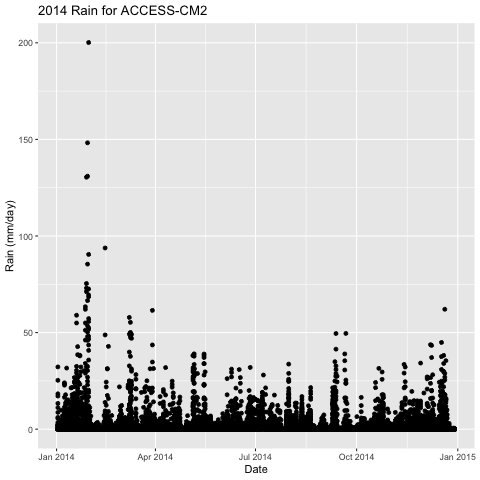

In [47]:
%%R


plot <- ggplot(result, aes(x=time, y=rain)) + 
geom_point() + 
labs(x='Date', 
     y='Rain (mm/day)',
     title = '2014 Rain for ACCESS-CM2')
plot

In [51]:
%%R

#ggsave(plot)

NULL


> Combining Data Comparison

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Adam Morphy | MacOS Big Sur | 8GB | 1.8 GHz Dual-Core Intel Core i5 | Yes | |
| Mukund Iyer | MacOS Monterey | 8GB | 1.4 GHz Quad-Core Intel Core i5 | Yes | |
| Julien Gordon | Ubuntu 20.04.4 LTS | 16GB | AMD® Ryzen 7 5800h with radeon graphics | Yes | |
| Shiva Shankar Jena | MacOS Catalina 10.15.7 | 4GB | 1.4 GHz Dual-Core Intel Core i5 | Yes | |